In [64]:
!jt -t gruvboxd -T -nfs 10 -ofs 12
# !jt -t gruvboxd -tfs 14 -nfs 115 -cellw 80% -T -cursc r -cursw 5 -dfs 8 -N
# !jt -r

In [5]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

## PEARL

Probabilistic Exact Adaptive Random Forest with Lossy Counting

Data streams are infinite sequences of items, with a temporal order.
#### Problems with Data Streams
* Stream data is large and fast, therefore we need to extract information in _real time_.
* Stream data may be evolving, so our models have to adapt when there are _changes_ in the data.
        warning: awesomeness ahead

### PEARL Architecture

<center>
<img src="img/architecture.svg"  class=filter-invert width="1200" height="1200">
</center>

### Probabilistic Graphical Model

<center><img src="img/graph.svg"  class=filter-invert width="800" height="800"/></center>

### Lossy Counting

The Lossy Counting algorithm computes _approximate frequency counts_ of elements in a data stream.

Its key idea is _NOT_ to keep the items with _very low frequency_. This can mitigate the side effects from wrong tree transitions!

<center>
<img src="img/lossy-count.svg"  class=filter-invert width="1200" height="1200">
</center>

### Case Study: Monitoring Gas Sensors

#### Data Set Information

* This dataset has recordings of a gas sensor array composed of 8 MOX gas sensors, and a temperature and humidity sensor.
* This sensor array was exposed to background home activity while subject to two different stimuli: wine and banana.
* Goal: discriminate among background, wine and banana.

<IPython.core.display.Javascript object>


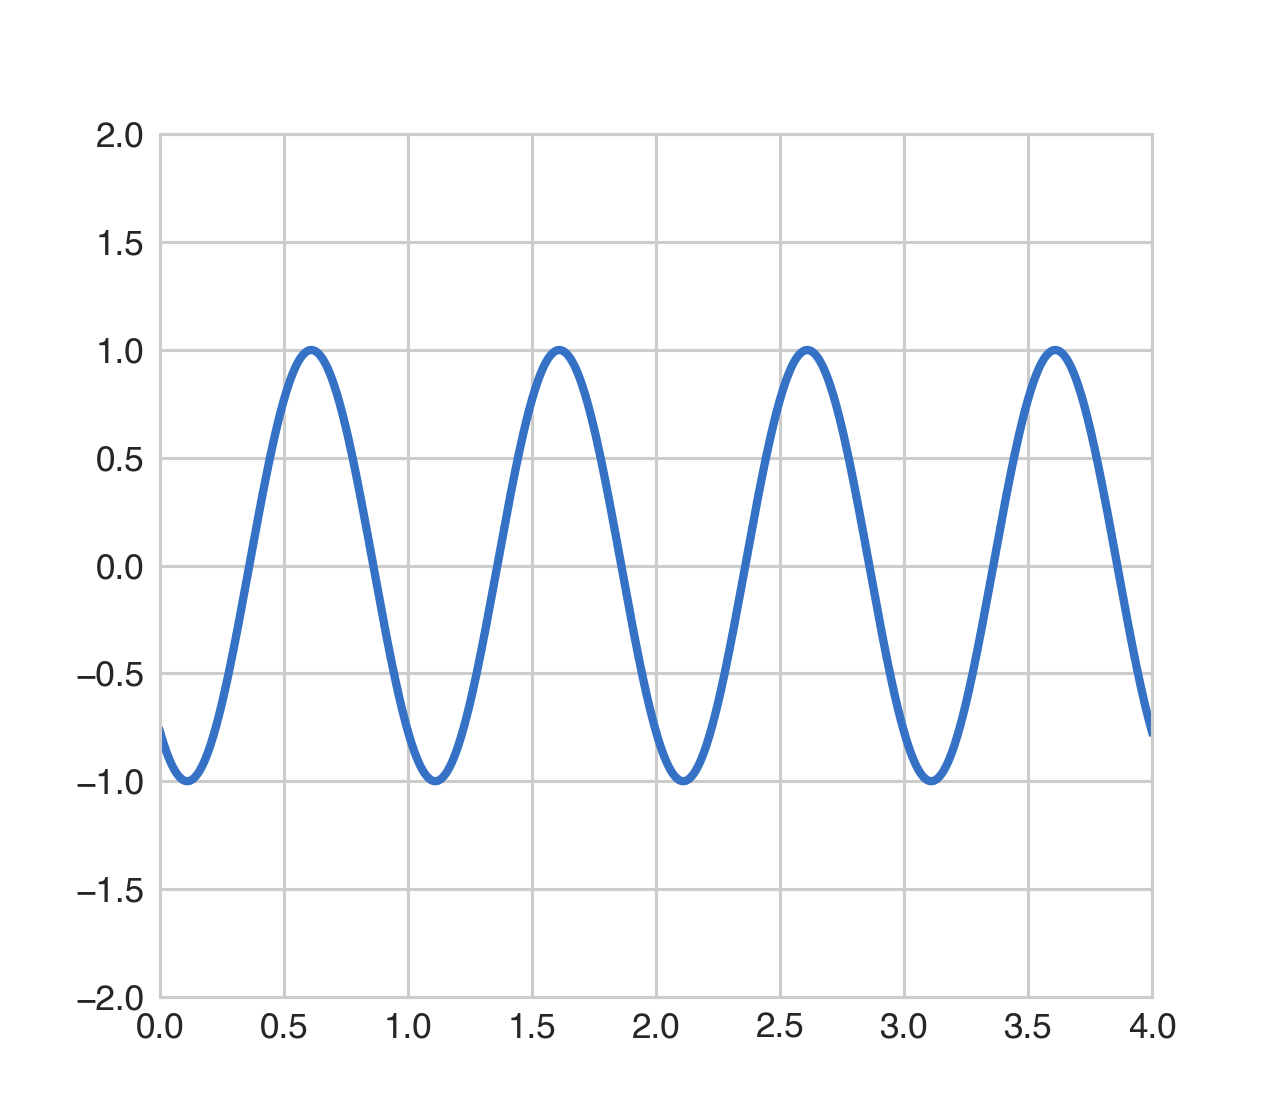

In [1]:
%matplotlib notebook

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from jupyterthemes import jtplot
jtplot.style()

fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

## Covtype Results

<center>
<img src="img/covtype-results.svg" class="filter-invert" width="1200" height="1200">
</center>

### scikit-ika

TODO: LOGO

A lifelong real-time adaptive predictive system for evolving data streams. Inspired by scikit-multiflow, following Scikit's philosophy.

In [ ]:
pip install scikit-ika

In [70]:
import skika
print(f"Hello {skika.__name__}")

Hello skika


# Questions